In [2]:
from utils.model import load_sammed2d
from classes.SAMMed2DClass import SAMMed2DInferer, SAMMed2DWrapper
from utils.base_classes import Points

import utils.analysis as anUt
import utils.prompt as prUt
from utils.image import read_im_gt


# Obtain model, image, gt
device = 'cuda'
sammed2d_checkpoint_path = "/home/t722s/Desktop/UniversalModels/TrainedModels/sam-med2d_b.pth"

sammed2d_model = load_sammed2d(sammed2d_checkpoint_path, device)
sammed2d_wrapper = SAMMed2DWrapper(sammed2d_model, device)
sammed2d_inferer = SAMMed2DInferer(sammed2d_wrapper)

# img_path = '/home/t722s/Desktop/Datasets/BratsMini/imagesTs/BraTS2021_01646.nii.gz'
# gt_path = '/home/t722s/Desktop/Datasets/BratsMini/labelsTs/BraTS2021_01646.nii.gz'
# img, gt = read_im_gt(img_path, gt_path)

# img_path = '/home/t722s/Desktop/Datasets/amosForUniversegTest/imagesTs/amos_0001.nii.gz'
# gt_path = '/home/t722s/Desktop/Datasets/amosForUniversegTest/labelsTs/amos_0001.nii.gz'
# img, gt = read_im_gt_row_major(img_path, gt_path, 2)

img_path = '/home/t722s/Desktop/Datasets/Dataset350_AbdomenAtlasJHU_sub/imagesTr/BDMAP_00000001_0000.nii.gz'
gt_path = '/home/t722s/Desktop/Datasets/Dataset350_AbdomenAtlasJHU_sub/labelsTr/BDMAP_00000001.nii.gz'
img, gt = read_im_gt(img_path, gt_path, 9)


/home/t722s/anaconda3/envs/universalModels/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/t722s/anaconda3/envs/universalModels/lib/python3.11/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


True
*******load /home/t722s/Desktop/UniversalModels/TrainedModels/sam-med2d_b.pth


In [4]:
# Experiment: 2d bounding box per slice with foreground
box_prompt = prUt.get_minimal_boxes_row_major(gt, 3, 3)

segmentation = sammed2d_inferer.predict(img, box_prompt)
anUt.compute_dice(segmentation, gt)

Performing inference on slices: 100%|██████████| 52/52 [00:01<00:00, 27.26it/s]


0.8443222134454528

In [4]:
# Experiment: n randomly sampled points from foreground
seed = 11121
n=1
pts_prompt = prUt.get_pos_clicks2D_row_major(gt, n, seed = seed)
segmentation = sammed2d_inferer.predict(img, pts_prompt)
anUt.compute_dice(segmentation, gt)

Performing inference on slices: 100%|██████████| 52/52 [00:01<00:00, 29.24it/s]


0.7332520706984923

In [3]:
# Experiment: Given n equally spaced slices, pick a 'central point' and interpolate a curve (DoF: linear vs cubic) between teh points
n = 5
interpolation = 'linear'
simulated_clicks = prUt.get_fg_points_from_cc_centers(gt, n)
coords = prUt.interpolate_points(simulated_clicks, kind = interpolation)
pts_prompt = Points({'coords': coords, 'labels': [1]*len(coords)})
segmentation = sammed2d_inferer.predict(img, pts_prompt)

anUt.compute_dice(segmentation, gt)

Performing inference on slices: 100%|██████████| 52/52 [00:02<00:00, 20.43it/s]


0.7273117702321836

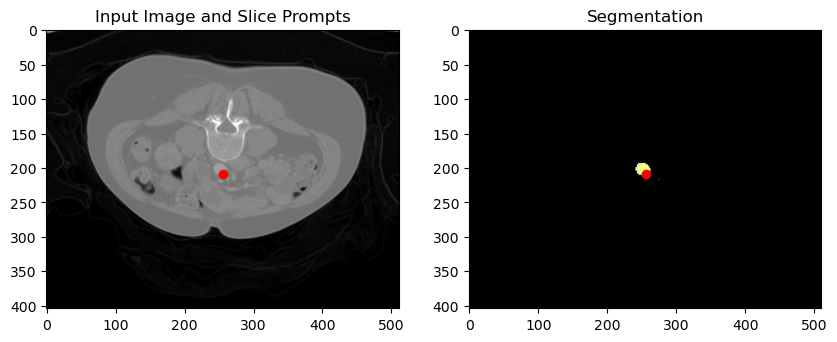

0.8787346221441125

In [32]:
# Visualise segmentation slice-wise
slice_idx = 110
anUt.show_seg_row_major(slice_idx, img, gt, segmentation, pts_prompt = pts_prompt)